Covid-19 Dataset was downloaded from: https://www.kaggle.com/datasets/meirnizri/covid19-dataset 

In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import missingno as msno

import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split

#Libraries for Forward Selection
import joblib
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


from scipy import stats
import os
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [ ]:
file = ('/content/Covid _19 _Dataset.csv')  
#covid_ori_df is the original data
covid_ori_df = pd.read_csv(file)
covid_ori_df.shape
covidData = covid_ori_df.copy( deep= True )

In [ ]:
# converting missing data as nan in original data

#replace CLASIFFICATION_FINAL with 1,2,3 if patient is in different stages of Covid Exposure and 0 if patient is not a carrier of Covid
covid_ori_df.loc[covid_ori_df['CLASIFFICATION_FINAL']>3, 'CLASIFFICATION_FINAL'] = 0

# replace every column except CLASIFFICATION_FINAL with 97,98 and 99 with nan values and value 1 which is Yes nad 2 which is no is changed to 0
replaceMap_dict = { 1:1, 2:0, 97:np.nan, 98:np.nan, 99:np.nan, '9999-99-99':0 }
covidData_noClassification = covid_ori_df.drop(columns = 'CLASIFFICATION_FINAL').replace( replaceMap_dict )
#concat for classification_final column as it was dropped in above step
covid_ori_df = pd.concat(  [ covidData_noClassification, covid_ori_df['CLASIFFICATION_FINAL'] ], axis= 'columns'  )
covid_ori_df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,CLASIFFICATION_FINAL
0,0,1,1,1,03/05/2020,NaN,1.0,65.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3
1,0,1,0,1,03/06/2020,NaN,1.0,72.0,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0
2,0,1,0,0,09/06/2020,1.0,0.0,55.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,1,1,1,12/06/2020,NaN,0.0,53.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,0,1,0,1,21/06/2020,NaN,0.0,68.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,13,0,1,0,NaN,0.0,40.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1048571,1,13,0,0,0,0.0,0.0,51.0,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1048572,0,13,0,1,0,NaN,0.0,55.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1048573,0,13,0,1,0,NaN,0.0,28.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [ ]:
# changing DATE_DIED column having an actual Date to 1 which is the person has Died Due to covid
covid_ori_df.loc[ covid_ori_df['DATE_DIED'] !=0, 'DATE_DIED' ] = 1
covid_ori_df.DATE_DIED.unique()

array([1, 0], dtype=object)

In [ ]:
# converting missing data as nan in copied data

#replace CLASIFFICATION_FINAL with 1,2,3 if patient is in different stages of Covid Exposure and 0 if patient is not a carrier of Covid
covidData.loc[covidData['CLASIFFICATION_FINAL']>3, 'CLASIFFICATION_FINAL'] = 0

# replace every column except CLASIFFICATION_FINAL with 97,98 and 99 with nan values and value 1 which is Yes nad 2 which is no is changed to 0
replaceMap_dict = { 1:1, 2:0, 97:np.nan, 98:np.nan, 99:np.nan, '9999-99-99':0 }
covidData_noClassification = covidData.drop(columns = 'CLASIFFICATION_FINAL').replace( replaceMap_dict )
#concat for classification_final column as it was dropped in above step
covidData = pd.concat(  [ covidData_noClassification, covidData['CLASIFFICATION_FINAL'] ], axis= 'columns'  )
covidData

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,CLASIFFICATION_FINAL
0,0,1,1,1,03/05/2020,NaN,1.0,65.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3
1,0,1,0,1,03/06/2020,NaN,1.0,72.0,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,NaN,0
2,0,1,0,0,09/06/2020,1.0,0.0,55.0,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,1,1,1,12/06/2020,NaN,0.0,53.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
4,0,1,0,1,21/06/2020,NaN,0.0,68.0,NaN,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,0,13,0,1,0,NaN,0.0,40.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1048571,1,13,0,0,0,0.0,0.0,51.0,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1048572,0,13,0,1,0,NaN,0.0,55.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1048573,0,13,0,1,0,NaN,0.0,28.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


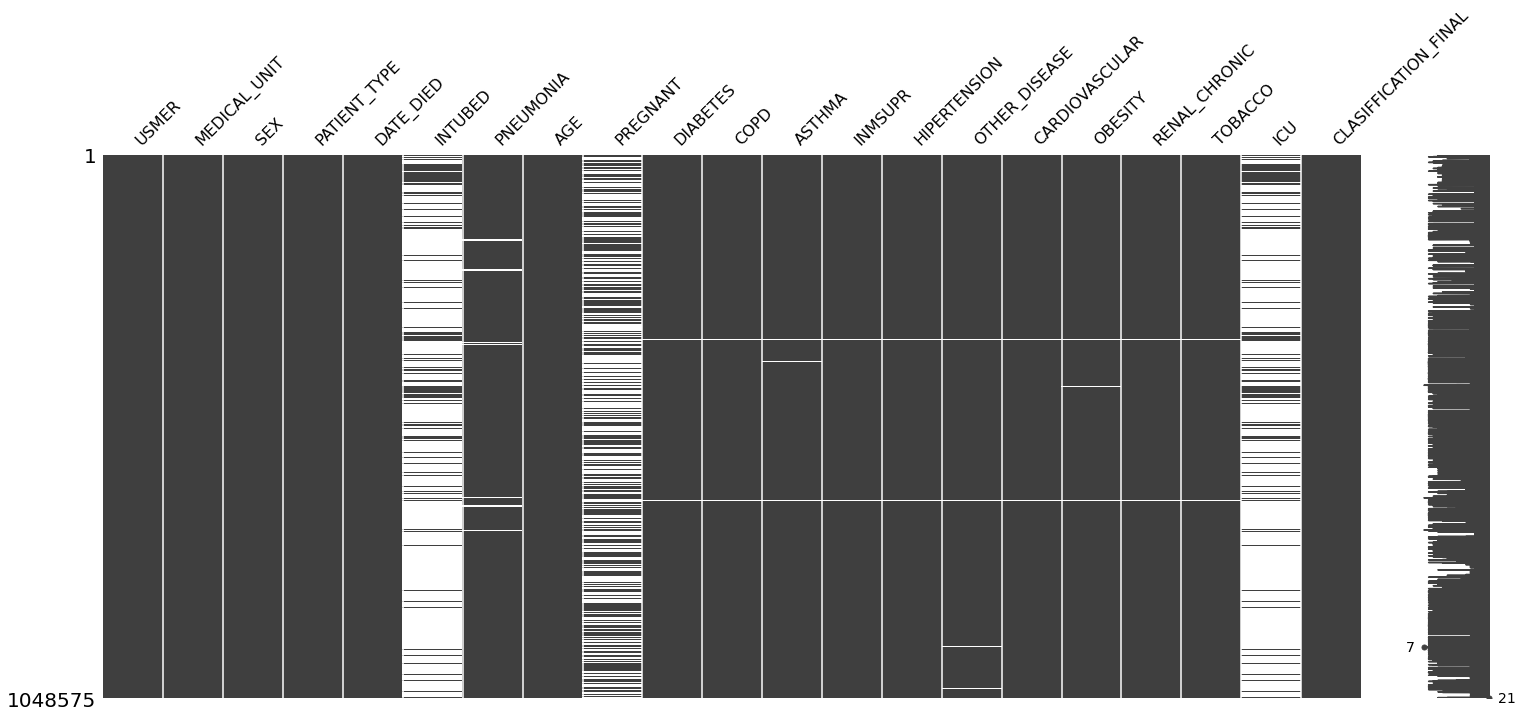

In [ ]:
#code to plot the matrix for missing data nan in copied data
msno.matrix( covidData );

In [ ]:
# Dropping the variable which is highly correlated from panda profiling report earlier and also with very high number of missing values
covidData.drop( columns=['INTUBED', 'MEDICAL_UNIT', 'ICU','PREGNANT'], inplace= True )

# changing DATE_DIED column having an actual Date to 1 which is the person has Died Due to covid
covidData.loc[ covidData['DATE_DIED'] !=0, 'DATE_DIED' ] = 1
covidData.DATE_DIED.unique()

array([1, 0], dtype=object)

In [ ]:
#dropping the missing values in copied data
covidData = covidData.dropna()

In [ ]:
covidData.isna().sum()

USMER                   0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
PNEUMONIA               0
AGE                     0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
dtype: int64

In [ ]:
#there is a missing values in original data
covid_ori_df.isna().sum()

USMER                        0
MEDICAL_UNIT                 0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
ICU                     856032
CLASIFFICATION_FINAL         0
dtype: int64

In [ ]:
#changing covidDataframe (copied data) to interger for converting the dataframe into categorical nominal datatypes
covidData = covidData.apply(  lambda df: df.astype(np.int8)  )
covidData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024829 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1024829 non-null  int8 
 1   SEX                   1024829 non-null  int8 
 2   PATIENT_TYPE          1024829 non-null  int8 
 3   DATE_DIED             1024829 non-null  int8 
 4   PNEUMONIA             1024829 non-null  int8 
 5   AGE                   1024829 non-null  int8 
 6   DIABETES              1024829 non-null  int8 
 7   COPD                  1024829 non-null  int8 
 8   ASTHMA                1024829 non-null  int8 
 9   INMSUPR               1024829 non-null  int8 
 10  HIPERTENSION          1024829 non-null  int8 
 11  OTHER_DISEASE         1024829 non-null  int8 
 12  CARDIOVASCULAR        1024829 non-null  int8 
 13  OBESITY               1024829 non-null  int8 
 14  RENAL_CHRONIC         1024829 non-null  int8 
 15  TOBACCO        

In [ ]:
#Renaming Target variable column with Death 
covidData.rename(  columns = { 'DATE_DIED':'Death' }, inplace= True  )

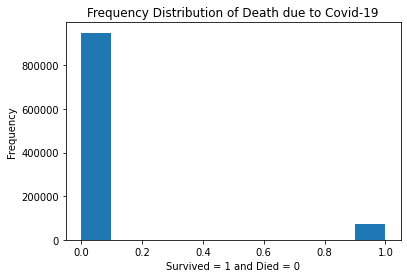

In [ ]:
# cheking the bar graph of target variable
plt.hist(covidData['Death'])
plt.ylabel('Frequency');  plt.xlabel('Survived = 1 and Died = 0');
plt.title('Frequency Distribution of Death due to Covid-19')
plt.show()

Dropping missing values and columns with high number of missing values

In [ ]:
##Testing the dataset afterremoving missing values and dropping the columns which had high missing values
#selecting dependent and independent variable as x and y
x = covidData.drop( "Death", axis= 1 )
y = covidData["Death"]
y= y.astype('int') 

random_underS = RandomUnderSampler(random_state=0)
x, y = random_underS.fit_resample(x,y)

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))



-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.92      0.89      0.90     22268
           1       0.89      0.92      0.91     22500

    accuracy                           0.90     44768
   macro avg       0.90      0.90      0.90     44768
weighted avg       0.90      0.90      0.90     44768

The percentage of accuracy of Logistic Regression is:  0.904328984989278
Test Score:  0.904328984989278
Matthewus corr coefficient: 0.8089425782506346
Brier_score is: 0.09567101501072195

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     22268
           1       0.88      0.92      0.90     22500

    accuracy                           0.90     44768
   macro avg       0.90      0.90      0.90     44768
weighted avg       0.90      0.90      0.90     44768



Repeating the same process in imbalanced dataset 

In [ ]:
x = covidData.drop( "Death", axis= 1 )
y = covidData["Death"]
y= y.astype('int')
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )
#selecting dependent and independent variable as x and y and finding the performance of algorith by removing missing values and without balancing
print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))



-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    284952
           1       0.59      0.43      0.50     22497

    accuracy                           0.94    307449
   macro avg       0.77      0.70      0.73    307449
weighted avg       0.93      0.94      0.93    307449

The percentage of accuracy of Logistic Regression is:  0.9365390682682331
Test Score:  0.9365390682682331
Matthewus corr coefficient: 0.47049754114543096
Brier_score is: 0.0634609317317669

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96    284952
           1       0.55      0.43      0.48     22497

    accuracy                           0.93    307449
   macro avg       0.75      0.70      0.72    307449
weighted avg       0.93      0.93      0.93    307449

In [ ]:
# impute missing value in original data
covid_ori_df.columns
#dropping only 'MEDICAL_UNIT' which has irrelevant data and it does not explain my research question
covid_ori_df.drop( columns= 'MEDICAL_UNIT', inplace= True )

In [ ]:
covid_ori_df.isna().sum()

USMER                        0
SEX                          0
PATIENT_TYPE                 0
DATE_DIED                    0
INTUBED                 855869
PNEUMONIA                16003
AGE                        345
PREGNANT                527265
DIABETES                  3338
COPD                      3003
ASTHMA                    2979
INMSUPR                   3404
HIPERTENSION              3104
OTHER_DISEASE             5045
CARDIOVASCULAR            3076
OBESITY                   3032
RENAL_CHRONIC             3006
TOBACCO                   3220
ICU                     856032
CLASIFFICATION_FINAL         0
dtype: int64

Imputing Missing Data

In [ ]:
#numerical column
num_col_ls = [ 'CLASIFFICATION_FINAL','AGE' ] 
cat_col_ls = covid_ori_df.drop( columns= num_col_ls ).columns

# impute missing values of categorical column to their mode
for col in cat_col_ls:
    covid_ori_df[col].fillna(covid_ori_df[col].mode()[0], inplace=True)

# impute numerical col: "AGE" to their mean and classification doesn't have missing values
mean_value = covid_ori_df['AGE'].mean()
covid_ori_df['AGE'].fillna(mean_value, inplace=True)

In [ ]:
covid_ori_df.isna().sum()

USMER                   0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
ICU                     0
CLASIFFICATION_FINAL    0
dtype: int64

In [ ]:
covid_ori_df['Death'] = covid_ori_df['DATE_DIED']
covid_ori_df.drop( columns= 'DATE_DIED', inplace= True )

In [ ]:
from pandas.compat.numpy.function import CompatValidator
#selecting dependent and independent variable as x and y after imputing missing values in balanced equaltion with random under sampler
x = covid_ori_df.drop( "Death", axis= 1 )
y = covid_ori_df["Death"]
y= y.astype('int') 

random_underS = RandomUnderSampler(random_state=0)
x, y = random_underS.fit_resample(x,y)

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))



-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.90      0.90     22803
           1       0.90      0.91      0.91     23363

    accuracy                           0.91     46166
   macro avg       0.91      0.91      0.91     46166
weighted avg       0.91      0.91      0.91     46166

The percentage of accuracy of Logistic Regression is:  0.9051466447168912
Test Score:  0.9051466447168912
Matthewus corr coefficient: 0.8102860615842786
Brier_score is: 0.09485335528310879

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     22803
           1       0.89      0.92      0.90     23363

    accuracy                           0.90     46166
   macro avg       0.90      0.90      0.90     46166
weighted avg       0.90      0.90      0.90     46166

In [ ]:
#selecting dependent and independent variable as x and y by imputing missing valuues in imbalanced dataset
x = covid_ori_df.drop( "Death", axis= 1 )
y = covid_ori_df["Death"]
y= y.astype('int') 

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))


-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291380
           1       0.70      0.48      0.57     23193

    accuracy                           0.95    314573
   macro avg       0.83      0.73      0.77    314573
weighted avg       0.94      0.95      0.94    314573

The percentage of accuracy of Logistic Regression is:  0.9467182498180072
Test Score:  0.9467182498180072
Matthewus corr coefficient: 0.5559250945302314
Brier_score is: 0.053281750181992736

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291380
           1       0.65      0.49      0.56     23193

    accuracy                           0.94    314573
   macro avg       0.80      0.74      0.76    314573
weighted avg       0.94      0.94      0.94    31457

Box-Cox transformation of Numerical Data Age

<AxesSubplot:xlabel='AGE', ylabel='Count'>

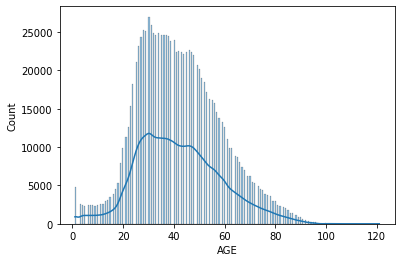

In [ ]:
from scipy import stats
import numpy as np
from scipy.special import boxcox1p
import seaborn as sns
from scipy import stats
data_age_num = covid_ori_df['AGE'] 
positivedata = data_age_num[data_age_num > 0]
sns.histplot(positivedata, kde=True)

<AxesSubplot:ylabel='Count'>

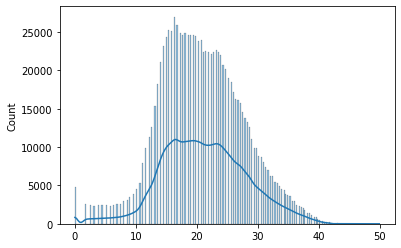

In [ ]:
# Applying the Box-Cox transformation to convert into normal distribution
data_boxcox, lam = stats.boxcox(positivedata)
# Plotting the transformed data distribution
sns.histplot(data_boxcox, kde=True)

SMOTE technique for imbalanced dataset

In [ ]:
#!pip install imblearn
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
covid_ori_df['Death'].value_counts()

0    971633
1     76942
Name: Death, dtype: int64

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy  0.9472459492709164
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    291490
           1       0.70      0.49      0.57     23083

    accuracy                           0.95    314573
   macro avg       0.83      0.73      0.77    314573
weighted avg       0.94      0.95      0.94    314573



<AxesSubplot:>

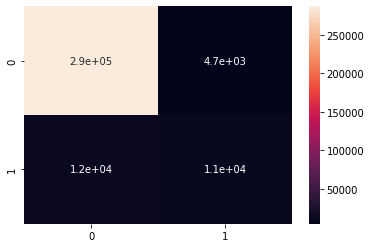

In [ ]:
X = covid_ori_df.drop(columns=['Death'])
y = covid_ori_df['Death']

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=100,test_size=0.3,stratify=y)

model_example = LogisticRegression()
model_example.fit(x_train,y_train)
pred = model_example.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2g')
# Here the recall valies shows 0.98 and 0.41 for 0 and 1 respectively so applying SMOTE technique which is an oversampling technique

In [ ]:
from imblearn.over_sampling import SMOTE 
over_samplingTech = SMOTE()
X, y = over_samplingTech.fit_resample(X, y)

smote_sm = SMOTE(sampling_strategy=0.5,k_neighbors=5,random_state = 100) 
X_train_res, y_train_res = smote_sm.fit_resample(x_train, y_train.ravel()) 
  

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy  0.9110127061127306
              precision    recall  f1-score   support

           0       0.99      0.92      0.95    291490
           1       0.44      0.85      0.58     23083

    accuracy                           0.91    314573
   macro avg       0.72      0.88      0.77    314573
weighted avg       0.95      0.91      0.92    314573



<AxesSubplot:>

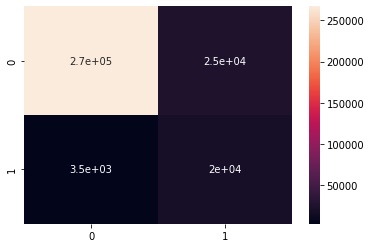

In [ ]:
Log_reg = LogisticRegression() 
Log_reg.fit(X_train_res, y_train_res.ravel()) 
prediction_value = Log_reg.predict(x_test) 
  
print('Accuracy ',accuracy_score(y_test,prediction_value))
print(classification_report(y_test, prediction_value)) 
sns.heatmap(confusion_matrix(y_test,prediction_value),annot=True,fmt='.2g')

<AxesSubplot:>

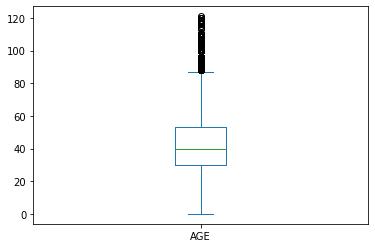

In [ ]:
#To remove outliers in my dataset
covid_ori_df.AGE.plot( kind= 'box' )

121.0 87.0


<AxesSubplot:>

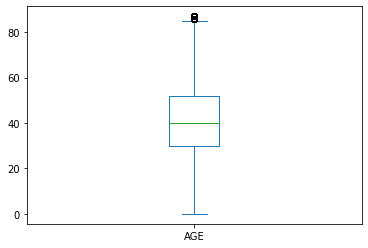

In [ ]:
Q1 = covid_ori_df['AGE'].quantile(0.25)
Q3 = covid_ori_df['AGE'].quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5 * IQR)
u_bound = Q3 + (1.5 * IQR)

covid_removeOutlier_df = covid_ori_df[(covid_ori_df['AGE'] >= l_bound) & (covid_ori_df['AGE'] <= u_bound)]
print( covid_ori_df.AGE.max(), covid_removeOutlier_df.AGE.max() )
covid_removeOutlier_df.AGE.plot( kind= 'box' )

K- Fold

In [ ]:
#selecting dependent and independent variable as x and y
x = covid_removeOutlier_df.drop( "Death", axis= 1 )
y = covid_removeOutlier_df ["Death" ]
y= y.astype('int') 
k = 5
x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )
import warnings
warnings.filterwarnings("ignore")

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )

## logistic Regression

LogiReg = LogisticRegression()
# Calculate the cross-validation score
scores = sklearn.model_selection.cross_val_score( LogiReg, x, y, cv= k )
print( "Cross-validation scores:", scores )
print( "Mean accuracy:", np.mean(scores) )
print( "Standard deviation:", np.std(scores) )


print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
# Calculate the cross-validation score
scores = sklearn.model_selection.cross_val_score( Random_Forest, x, y, cv= k )
print( "Cross-validation scores:", scores )
print( "Mean accuracy:", np.mean(scores) )
print( "Standard deviation:", np.std(scores) )


print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
# Calculate the cross-validation score
scores = sklearn.model_selection.cross_val_score( Nbayes, x, y, cv= k )
print( "Cross-validation scores:", scores )
print( "Mean accuracy:", np.mean(scores) )
print( "Standard deviation:", np.std(scores) )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
# Calculate the cross-validation score
scores = sklearn.model_selection.cross_val_score( Decision_T, x, y, cv= k )
print( "Cross-validation scores:", scores )
print( "Mean accuracy:", np.mean(scores) )
print( "Standard deviation:", np.std(scores) )






-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------
Cross-validation scores: [0.92486197 0.93253968 0.93732267 0.95280749 0.9521557 ]
Mean accuracy: 0.9399375047925773
Standard deviation: 0.010988699972189564

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
Cross-validation scores: [0.91355628 0.92126275 0.92908903 0.94887279 0.9511205 ]
Mean accuracy: 0.932780269917951
Standard deviation: 0.014907538286723218

-------------------------------------------------------------------------------------
----------------------------- Naive Bayes ---------------------------
Cross-validation scores: [0.88139809 0.88711564 0.89833985 0.95759528 0.96703665]
Mean accuracy: 0.9182971014492753
Standard deviation: 0.036474657421258654

------------------------------------------------

Feature Selection: warpper method: Forward Selection

In [ ]:
#Libraries for Forward Selection
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

x = covid_removeOutlier_df.drop( columns= 'Death' ) #independent variable
y = covid_removeOutlier_df['Death'] #dependent variable

#Defining Forward Selection(Sequential)
sq_FS = SFS(  LogisticRegression(), k_features= 5, forward= True, floating=False,  # <-- based on above results
              scoring = 'r2', cv = 5 )
sq_FS.fit(x, y)

FS_features = pd.DataFrame(sq_FS.subsets_).transpose()
FS_features

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[0.1371276833766406, 0.20195364131888183, 0.23...",0.191254,"(INTUBED,)"
2,"(3, 5)","[0.13985171328705748, 0.2118467779967469, 0.23...",0.193304,"(INTUBED, AGE)"
3,"(3, 5, 6)","[0.13992339828470002, 0.21285042954377675, 0.2...",0.193534,"(INTUBED, AGE, PREGNANT)"
4,"(3, 5, 6, 9)","[0.13978002828941494, 0.2126353613551275, 0.23...",0.193318,"(INTUBED, AGE, PREGNANT, ASTHMA)"
5,"(3, 5, 6, 9, 16)","[0.13978002828941494, 0.21120157343079915, 0.2...",0.193046,"(INTUBED, AGE, PREGNANT, ASTHMA, TOBACCO)"


In [ ]:
# select features based on forward selection on data set where missing values are imputed and outliers are adjusted
covid_df = covid_removeOutlier_df[ ['INTUBED','AGE','PREGNANT','TOBACCO','ASTHMA', 'Death'] ]
covid_df

,INTUBED,AGE,PREGNANT,TOBACCO,ASTHMA,Death
0,0.0,65.0,0.0,0.0,0.0,1
1,0.0,72.0,0.0,0.0,0.0,1
2,1.0,55.0,0.0,0.0,0.0,1
3,0.0,53.0,0.0,0.0,0.0,1
4,0.0,68.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...
1048570,0.0,40.0,0.0,0.0,0.0,0
1048571,0.0,51.0,0.0,0.0,0.0,0
1048572,0.0,55.0,0.0,0.0,0.0,0
1048573,0.0,28.0,0.0,0.0,0.0,0


In [ ]:
#diving the dataset into train and test sets

#selecting dependent and independent variable as x and y
x = covid_df.drop( "Death", axis= 1 )
y = covid_df["Death"]

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

random_underS = RandomUnderSampler(random_state=0)
x, y = random_underS.fit_resample(x,y)

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))



-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    290322
           1       0.82      0.32      0.46     22662

    accuracy                           0.95    312984
   macro avg       0.88      0.66      0.72    312984
weighted avg       0.94      0.95      0.93    312984

The percentage of accuracy of Logistic Regression is:  0.945700099685607
Test Score:  0.945700099685607
Matthewus corr coefficient: 0.49281312572057945
Brier_score is: 0.054299900314393065

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    290322
           1       0.80      0.33      0.47     226

Feature Selection: Lasso Ridge Regression

In [ ]:
import sklearn
# data x y 
# covidData
x = covid_removeOutlier_df.drop( "Death", axis= 1 )
y = covid_removeOutlier_df[ "Death" ]
lamda_rng = np.logspace( start= -4, stop= 4, num= 50 )
cv_Score_mean, cv_Score_SD = [], []
coeffi_dict = {}
for e_lamda in lamda_rng:
    linReg_Lasso_obj = sklearn.linear_model.Lasso( alpha= e_lamda )
    coeffi_dict[e_lamda] = linReg_Lasso_obj.fit( x,y ).coef_
    # Performing 10-fold Cross Validation
    cvScore = sklearn.model_selection.cross_val_score( estimator= linReg_Lasso_obj, X= x, y= y, cv= 10 )    
    # mean and Standard Deviation of Cross Validation score
    cv_Score_mean.append( np.mean(cvScore) );           cv_Score_SD.append( np.std(cvScore) )

In [ ]:
w_ls = []
for e_key in coeffi_dict:
    for e_w in range( len(coeffi_dict[e_key]) ):
        w_ls.append(  coeffi_dict[e_key][e_w] )

w_array = np.reshape(  w_ls,
                     ( len(w_ls)//len(coeffi_dict[e_key]), len(coeffi_dict[e_key]) )
                  )
w_Lasso_dataframe = pd.DataFrame( w_array )
w_Lasso_dataframe['lamda'] = coeffi_dict.keys()

w_Lasso_dataframe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,lamda
0,0.006690,-0.012366,-0.153033,0.493760,0.119181,0.001900,-0.003427,0.022601,0.009477,-0.005516,-0.0,0.009280,0.006820,0.0,-0.000448,0.049518,-0.002377,-0.082162,0.009341,0.000100
1,0.006583,-0.012229,-0.153179,0.491385,0.118843,0.001913,-0.000000,0.022356,0.006035,-0.003871,0.0,0.009118,0.005155,0.0,-0.000078,0.047328,-0.001633,-0.077718,0.009332,0.000146
2,0.006422,-0.011942,-0.153460,0.487908,0.118334,0.001929,-0.000000,0.022020,0.001042,-0.001451,0.0,0.008934,0.002775,0.0,-0.000000,0.044091,-0.000518,-0.071213,0.009326,0.000212


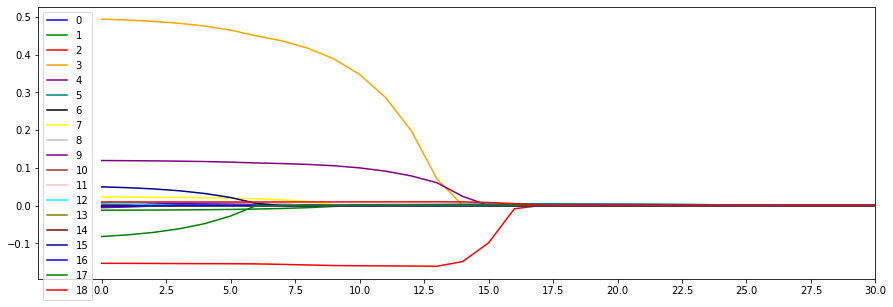

In [ ]:
import matplotlib.ticker as mtick
fg,ax = plt.subplots( figsize= (15,5) )
all_color_ls = ['blue', 'green', 'red', 'orange', 'purple', 'teal', 'black', 'yellow', 'silver', 'purple', 'brown', 'pink', 'cyan', 'olive', 'maroon', 'darkblue' ]
w_Lasso_dataframe.drop('lamda',axis=1).plot( ax= ax, color= all_color_ls )
ax.set_xticklabels( w_Lasso_dataframe['lamda'], rotation= 0 )
ax.xaxis.set_major_formatter( mtick.FormatStrFormatter('%2.1f') )
ax.set_xlim( right= 30 )
ax.locator_params( axis= 'x', nbins= 15 )
plt.show()

In [ ]:
import_featurebyindex = [ 2 , 18, 9, 3]
import_column = []
for e_impFeature in import_featurebyindex:
  import_column.append( list(x.columns)[e_impFeature] )
import_column

['PATIENT_TYPE', 'CLASIFFICATION_FINAL', 'ASTHMA', 'INTUBED']

In [ ]:
covid_df1 = covid_removeOutlier_df[ ['PATIENT_TYPE', 'CLASIFFICATION_FINAL', 'ASTHMA', 'INTUBED', 'Death'] ]
covid_df1

x = covid_df1.drop( "Death", axis= 1 )
y = covid_df1["Death"]

random_underS = RandomUnderSampler(random_state=0)
x, y = random_underS.fit_resample(x,y)

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))


-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     22353
           1       0.88      0.91      0.89     22744

    accuracy                           0.89     45097
   macro avg       0.89      0.89      0.89     45097
weighted avg       0.89      0.89      0.89     45097

The percentage of accuracy of Logistic Regression is:  0.8889283100871455
Test Score:  0.8889283100871455
Matthewus corr coefficient: 0.7783747725972162
Brier_score is: 0.11107168991285452

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     22353
           1       0.88      0.91      0.89     227

Chi-Sqaure Test for Feature Selection

In [ ]:
X = covid_removeOutlier_df.drop( "Death", axis= 1 )
Y = covid_removeOutlier_df[ "Death" ]

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 5 best features
best_feat = SelectKBest(score_func=chi2, k=10)
fit_dataframe = best_feat.fit(X,Y)
dataframe_scores = pd.DataFrame(fit_dataframe.scores_)
dataframe_columns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
features_Scores = pd.concat([dataframe_columns,dataframe_scores],axis=1)
features_Scores.columns = ['Specs','Score']  #naming the dataframe columns
print(features_Scores.nlargest(5,'Score'))  #print 5 best features

                   Specs          Score
5                    AGE  687046.757379
3                INTUBED  250616.583127
4              PNEUMONIA  198864.795841
18  CLASIFFICATION_FINAL   68939.531361
2           PATIENT_TYPE   52095.601073


In [ ]:
covid_df_chi = covid_removeOutlier_df[ ['AGE','INTUBED','PNEUMONIA','PATIENT_TYPE','CLASIFFICATION_FINAL', 'Death'] ]
covid_df_chi

,AGE,INTUBED,PNEUMONIA,PATIENT_TYPE,CLASIFFICATION_FINAL,Death
0,65.0,0.0,1.0,1,3,1
1,72.0,0.0,1.0,1,0,1
2,55.0,1.0,0.0,0,3,1
3,53.0,0.0,0.0,1,0,1
4,68.0,0.0,0.0,1,3,1
...,...,...,...,...,...,...
1048570,40.0,0.0,0.0,1,0,0
1048571,51.0,0.0,0.0,0,0,0
1048572,55.0,0.0,0.0,1,0,0
1048573,28.0,0.0,0.0,1,0,0


In [ ]:
#diving the dataset into train and test sets
from sklearn.model_selection import train_test_split
x = covid_df_chi.drop("Death", axis=1)
y = covid_df_chi["Death"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3, 
                                                    random_state=28, 
                                                    stratify=y)

random_underS = RandomUnderSampler(random_state=0)
x, y = random_underS.fit_resample(x,y)

x_train, x_test, y_train, y_test= train_test_split( x, y, test_size= 0.3, random_state= 0 )

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Logistic Regression ---------------------------' )
## logistic Regression

LogiReg = LogisticRegression()
LogiReg.fit(x_train, y_train)
predict_LR = LogiReg.predict(x_test)
logiR_score = accuracy_score(y_test, predict_LR)
print(classification_report(y_test,predict_LR))
print("The percentage of accuracy of Logistic Regression is: ", logiR_score)
print('Test Score: ', LogiReg.score(x_test, y_test))
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predict_LR ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predict_LR ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Random Forest ---------------------------' )

## Random Forest
Random_Forest = RandomForestClassifier()
Random_Forest.fit(x_train, y_train)
predicted_RF = Random_Forest.predict(x_test)
RF_score = accuracy_score(y_test, predicted_RF)
print(classification_report(y_test,predicted_RF))
print('The percentage of accuracy of Random Forest (on test data) is: ', RF_score )
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_RF ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_RF ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Naive Bayes ---------------------------' )

## Naive Bayes
Nbayes = BernoulliNB()
Nbayes.fit(x_train, y_train)
predicted_NB = Nbayes.predict(x_test)
NB_score = accuracy_score(y_test, predicted_NB)
print(classification_report(y_test,predicted_NB))
print("The percentage of accuracy of Naive-Bayes (on test data) is:", NB_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_NB ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_NB ))

print( '\n-------------------------------------------------------------------------------------' )
print( '----------------------------- Decision Tree ---------------------------' )

## Decision Tree
Decision_T =  DecisionTreeClassifier()
Decision_T.fit(x_train, y_train)
predicted_DT = Decision_T.predict(x_test)
DT_score = accuracy_score(y_test, predicted_DT)
print(classification_report(y_test,predicted_DT))
print("The percentage of accuracy of Decision Tree is (on test data) :", DT_score)
print("Matthewus corr coefficient:", sklearn.metrics.matthews_corrcoef( y_test, predicted_DT ))
print("Brier_score is:", sklearn.metrics.brier_score_loss( y_test, predicted_DT ))



-------------------------------------------------------------------------------------
----------------------------- Logistic Regression ---------------------------
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     22353
           1       0.90      0.91      0.90     22744

    accuracy                           0.90     45097
   macro avg       0.90      0.90      0.90     45097
weighted avg       0.90      0.90      0.90     45097

The percentage of accuracy of Logistic Regression is:  0.9007251036654322
Test Score:  0.9007251036654322
Matthewus corr coefficient: 0.8014798304333182
Brier_score is: 0.09927489633456771

-------------------------------------------------------------------------------------
----------------------------- Random Forest ---------------------------
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     22353
           1       0.89      0.94      0.91     227